In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/hour.csv', index_col = 0)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [58]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [62]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<ipython-input-63-af5fb9cd8733>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df.corr())
<ipython-input-63-af5fb9cd8733>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f", mask = mask)


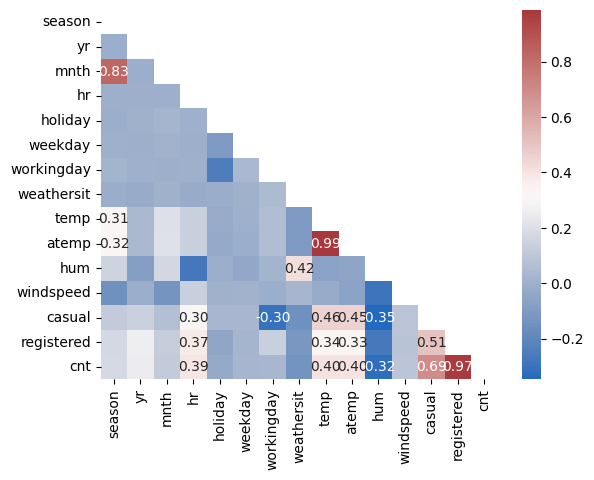

In [63]:
import seaborn as sns
mask = np.triu(df.corr())

ax = sns.heatmap(df.corr(), cmap="vlag", annot=True, fmt="0.2f", mask = mask)
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text("")


In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Пропущенных значений нет. Оставляем Feature, выделяем Target

In [64]:
X=df.drop(['cnt','dteday','registered','casual'],axis=1)
y=df['cnt']

In [68]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

Разделяем выборку на обучающую и тестовую

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,
                                                 test_size=0.3,random_state=39)
print('Initial size = ',X_scaled.shape,' Train size = ',X_train.shape,
      'Test size = ', X_test.shape)

Initial size =  (17379, 12)  Train size =  (12165, 12) Test size =  (5214, 12)


# Линейный регрессор

In [70]:
from sklearn.linear_model import LinearRegression
parameters = {'fit_intercept': [True, False], 'positive':[True, False]}
model1 = LinearRegression()
gridLinear = GridSearchCV(estimator=model1, param_grid=parameters)
gridLinear.fit(X_train, y_train)
print('Best score:', round(gridLinear.best_score_,3))
print('Best model:', gridLinear.best_estimator_)

Best score: 0.388
Best model: LinearRegression(fit_intercept=False)


лучший гиперпараметр: fit_intercept=False

In [72]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [73]:
print('weight_0 =',np.round(linear_model.intercept_,3))
print('weights = ',np.round(linear_model.coef_,3))

weight_0 = 0.0
weights =  [  57.178   79.911    0.829  172.144  -17.038    5.529    5.994   -9.633
   46.541  264.054 -202.927   33.08 ]


In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred_linear_model = linear_model.predict(X_test)
print('Linear Regression Estimation:')
print('R2-score:',round(r2_score(y_test,y_pred_linear_model),3))
print('MSE:',round(mean_squared_error(y_test,y_pred_linear_model),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_linear_model),3))

Linear Regression Estimation:
R2-score: 0.388
MSE: 20955.435
MAE: 108.009


# Полиномиальный регрессор

In [76]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
X_train_quad = quadratic.fit_transform(X_train)
X_test_quad = quadratic.transform(X_test)

In [77]:
X_train_quad.shape

(12165, 91)

In [78]:
parameters = {'copy_X': [True, False], 'positive':[True, False]}
model2 = LinearRegression()
gridPoly = GridSearchCV(estimator=model2, param_grid=parameters)
gridPoly.fit(X_train_quad, y_train)
print('Best score:', round(gridPoly.best_score_,3))
print('Best model:', gridPoly.best_estimator_)

Best score: 0.543
Best model: LinearRegression()


лучшие гиперпараметры по умолчанию

In [80]:
quad_model = LinearRegression()
quad_model.fit(X_train_quad,y_train)

LinearRegression()

In [81]:
print('weight_0 =',np.round(quad_model.intercept_,3))
print('weights = ',np.round(quad_model.coef_,3))

weight_0 = -203.798
weights =  [-0.00000000e+00  4.93040000e+01 -2.46727319e+14 -2.18490000e+01
  8.01208000e+02  1.20834586e+13 -1.07630000e+01 -2.26118804e+13
  4.94520000e+01  1.27063000e+03 -8.92285000e+02  3.44909000e+02
 -8.48180000e+01  1.61700000e+00  1.81060000e+01 -1.14590000e+01
  5.30200000e+01  4.22250000e+01  2.09530000e+01 -4.97900000e+00
 -4.28700000e+00 -2.15033000e+02  7.41830000e+01 -6.11100000e+00
  6.55460000e+01  2.46727319e+14 -7.90000000e-02  5.27860000e+01
 -9.99000000e+00  1.47000000e+01  1.98290000e+01  1.39890000e+01
 -2.25658000e+02  3.61905000e+02 -1.05742000e+02  4.07800000e+01
 -1.62890000e+01 -1.54920000e+01 -4.71640000e+01 -2.26680000e+01
  8.07800000e+00  8.12700000e+00  2.64100000e+00  3.16125000e+02
 -8.40200000e+01 -3.37930000e+01 -7.54586000e+02 -6.18000000e+00
  1.44840000e+01  6.42810000e+01 -4.92420000e+01  5.22938000e+02
 -1.11383000e+02 -2.16297000e+02  5.37300000e+01 -1.20834586e+13
 -8.50220000e+01  8.52635632e+11  5.16030000e+01  1.3073200

In [82]:
y_pred_quad_model = quad_model.predict(X_test_quad)
print('Quadratic Regression Estimation:')
print('R2-score:',round(r2_score(y_test,y_pred_quad_model),3))
print('MSE:',round(mean_squared_error(y_test,y_pred_quad_model),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_quad_model),3))

Quadratic Regression Estimation:
R2-score: 0.548
MSE: 15451.512
MAE: 93.142


In [83]:
cubic = PolynomialFeatures(degree=3)
X_train_cubic = cubic.fit_transform(X_train)
X_test_cubic = cubic.transform(X_test)

In [84]:
X_train_cubic.shape

(12165, 455)

In [85]:
parameters = {'copy_X': [True, False], 'positive':[True, False]}
model3 = LinearRegression()
gridCubic = GridSearchCV(estimator=model3, param_grid=parameters)
gridCubic.fit(X_train_cubic, y_train)
print('Best score:', round(gridCubic.best_score_,3))
print('Best model:', gridCubic.best_estimator_)

Best score: 0.61
Best model: LinearRegression()


гиперпараметры по умолчанию

In [86]:
cubic_model = LinearRegression()
cubic_model.fit(X_train_cubic,y_train)

LinearRegression()

In [87]:
print('weight_0 =',np.round(cubic_model.intercept_,3))
print('weights = ',np.round(cubic_model.coef_,3))

weight_0 = 173.983
weights =  [-0.00000000e+00 -3.96844000e+02  1.12846464e+14 -6.57640000e+01
 -1.24862600e+03 -1.22748938e+13 -2.08214662e+12  1.14677436e+13
  1.35644000e+02  1.52918500e+03 -1.71053000e+03  1.52719000e+02
 -5.79944000e+02  1.76790000e+01  1.10665190e+14  1.42911000e+02
  2.77209000e+02  3.02824477e+12  6.87570000e+01 -2.44101061e+13
 -1.53959000e+02 -3.07191700e+03  4.77800400e+03 -2.19050000e+01
  5.87982000e+02 -2.36675674e+14 -8.16003456e+13  7.59987934e+13
 -8.16142309e+12 -1.69527803e+14  2.27037831e+14 -7.82673300e+12
  3.28264236e+12  2.83736375e+12  4.36674376e+12 -9.85463280e+11
  2.19520000e+02 -1.21250000e+01 -2.95526384e+12 -1.52255000e+02
  1.45889124e+11  2.57702000e+02 -2.23985200e+03  1.50767600e+03
 -1.55438000e+02  1.21313000e+02  3.21604500e+03 -6.84770566e+12
  1.55342000e+02 -5.16387741e+12 -6.08527000e+02 -1.38020300e+03
  1.71469500e+03  7.22422000e+02 -3.86676000e+02  5.85427780e+12
  2.11838655e+11  1.39848562e+12 -2.12762986e+12  1.19903951

In [88]:
y_pred_cubic_model = cubic_model.predict(X_test_cubic)
print('Cubic Regression Estimation:')
print('R2-score:',round(r2_score(y_test,y_pred_cubic_model),3))
print('MSE:',round(mean_squared_error(y_test,y_pred_cubic_model),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_cubic_model),3))

Cubic Regression Estimation:
R2-score: 0.625
MSE: 12832.849
MAE: 80.759


# Регрессор, основанный на случайном лесе

In [89]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'n_estimators': [200, 300, 400],
              'max_features': [5, 15, 30, 40], 'max_depth': [3, 7, 9, 12]}
model = RandomForestRegressor()
gridForest = GridSearchCV(estimator=model, param_grid=parameters)
gridForest.fit(X_train, y_train)
print('Best score:', round(gridForest.best_score_,3))
print('Best model:', gridForest.best_estimator_)

Best score: 0.932
Best model: RandomForestRegressor(max_depth=12, max_features=30, n_estimators=400)


Нашли лучшие гиперпараметры

In [90]:
forest_model = RandomForestRegressor(n_estimators=400, max_depth=12, max_features=30)
forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, max_features=30, n_estimators=400)

In [91]:
y_pred_forest_model = forest_model.predict(X_test)
print('Tree Regression Estimation:')
print('R2-score:',round(r2_score(y_test,y_pred_forest_model),3))
print('MSE:',round(mean_squared_error(y_test,y_pred_forest_model),3))
print('MAE:',round(mean_absolute_error(y_test,y_pred_forest_model),3))

Tree Regression Estimation:
R2-score: 0.942
MSE: 1979.324
MAE: 27.233


<Axes: >

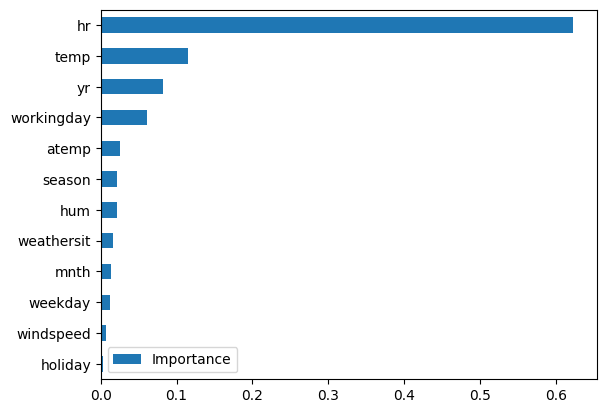

In [92]:
forest_feature_importances=pd.DataFrame(forest_model.feature_importances_,
                                      index=X.columns,
                                      columns=['Importance']).sort_values('Importance',
                                                                          ascending=True)
forest_feature_importances.plot.barh()

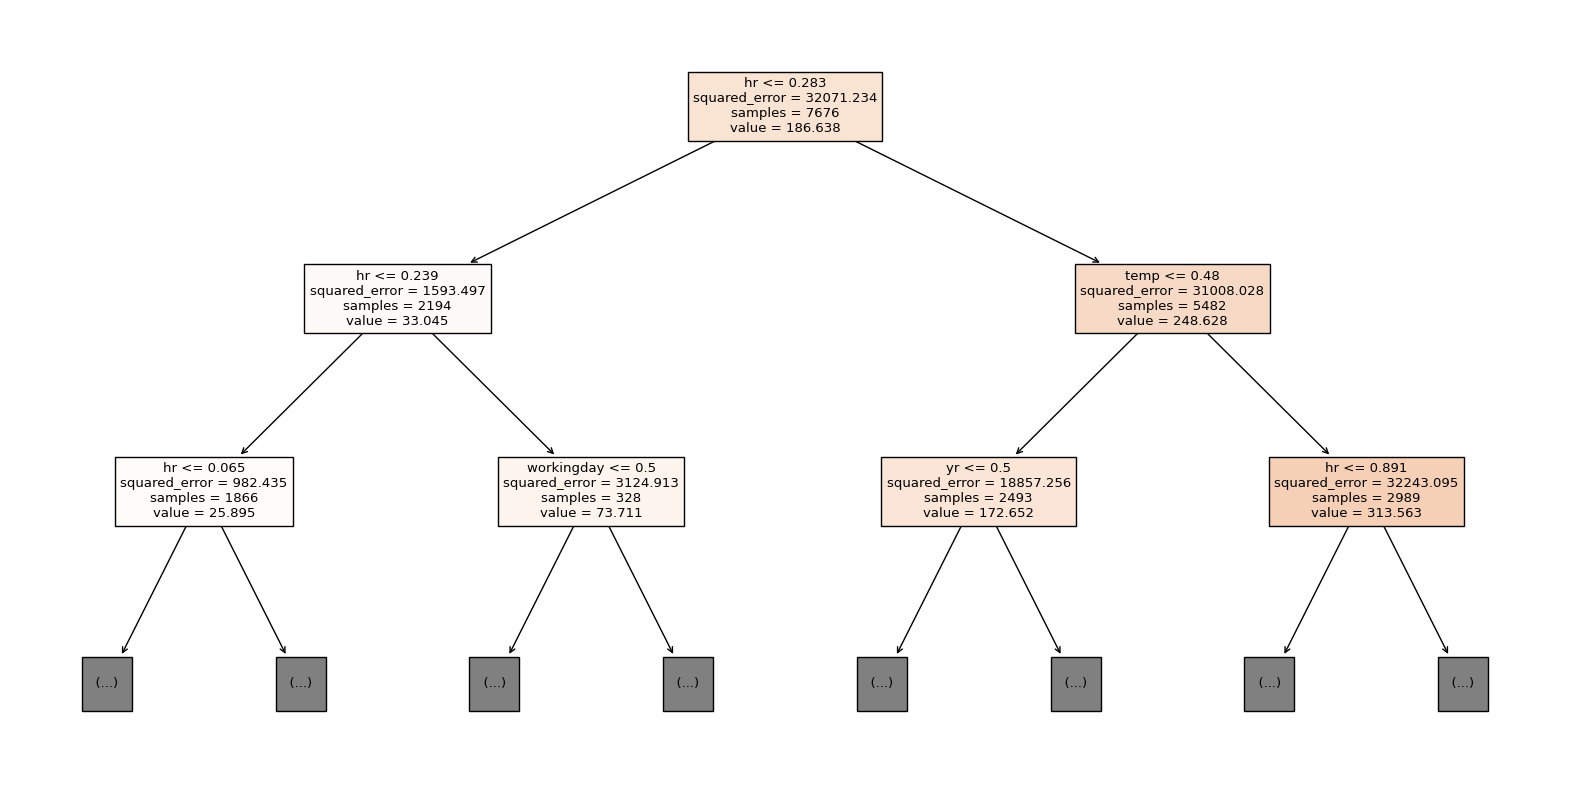

In [96]:
from sklearn import tree
import matplotlib.pyplot as plt
tree_0 = forest_model.estimators_[0]
plt.figure(figsize=(20,10))
tree.plot_tree(tree_0,feature_names=X.columns, filled = True, max_depth = 2)
plt.show()

# Gradient Boosting

In [100]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=39)

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators': [200, 300, 400],
              'max_features': [5, 15, 30, 40], 'max_depth': [3, 7, 9, 12]}
model = GradientBoostingRegressor(learning_rate=0.5, random_state = 39)
gridBoost = GridSearchCV(estimator=model, param_grid=parameters)
gridBoost.fit(X_train, y_train)
print('Best score:', round(gridBoost.best_score_,3))
print('Best model:', gridBoost.best_estimator_)

Best score: 0.931
Best model: GradientBoostingRegressor(learning_rate=0.5, max_depth=7, max_features=15,
                          n_estimators=200, random_state=39)


Нашли лучшие гиперпараметры

In [101]:
gradient_model = GradientBoostingRegressor(learning_rate=0.5, max_features=15, n_estimators=200, random_state=39, max_depth=7)
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=7, max_features=15,
                          n_estimators=200, random_state=39)

In [102]:
preds = gradient_model.predict(X_test)
print('Gradient Boosting Regression Estimation:')
print('R2-score:',round(r2_score(y_test,preds),3))
print('MSE:',round(mean_squared_error(y_test,preds),3))
print('MAE:',round(mean_absolute_error(y_test,preds),3))

Gradient Boosting Regression Estimation:
R2-score: 0.938
MSE: 2107.179
MAE: 28.779


<Axes: >

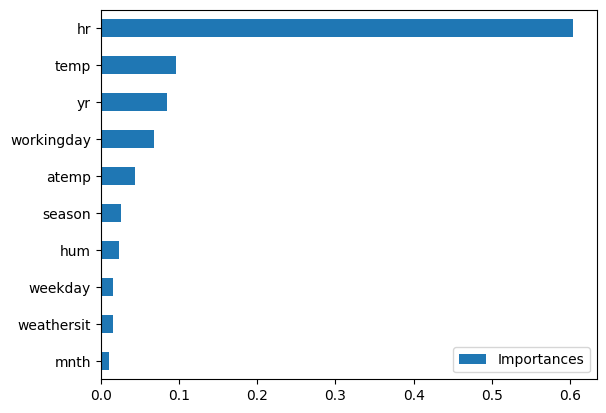

In [103]:
feature_importances = gradient_model.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances,
                                      columns=['Importances'],
                                      index = X.columns).sort_values('Importances', ascending=True)
feature_importances_df[-10:].plot.barh()

# Вывод
Лучшей моделью оказалась модель с использованием алгоритма, основанным на случайном лесе, похожий результат показала модель с алгоритмом Gradient Boosting(точность 0.932 и 0.931 соответсвенно).
Остальные модели показали меньшую точность.
Сравним значения качества лучших моделей
# RandomForest:
*   R2-score: 0.942
*   MSE: 1979.324
*   MAE: 27.233

# GradientBoosting
*   R2-score: 0.938
*   MSE: 2107.179
*   MAE: 28.779

R2-score(коэффициент детерминации), чем ближе к 1, тем лучше
MSE(средняя квадратичная ошибка), чем меньше, тем лучше
MAE(средняя абсолютная ошибка) для сравнения моделей

# Модель с алгоритмом RandomForest оказалась лучше
